In [1]:
# ! pip install matplotlib pandas

In [2]:
from sqlalchemy import create_engine
import pandas as pd

In [3]:
user = "schedulin"
passw = "MySQLIsFun"
host = "35.231.228.133"
database = "schedulin"

In [4]:
db = create_engine(
    'mysql+pymysql://{0}:{1}@{2}/{3}' \
        .format(user, passw, host, database), \
    connect_args = {'connect_timeout': 10})
conn = db.connect()

In [5]:
timetable_df = pd.read_sql_table(
    "timetable",
    con = conn)
resource_df = pd.read_sql_table(
    "resource",
    con = conn)
user_df = pd.read_sql_table(
    "user",
    con = conn)
reservation_df = pd.read_sql_table(
    "reservation",
    con = conn)

In [8]:
timetable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12 non-null     int64         
 1   start_time         12 non-null     object        
 2   end_time           12 non-null     object        
 3   creation_date      12 non-null     datetime64[ns]
 4   modification_date  12 non-null     datetime64[ns]
 5   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 704.0+ bytes


In [9]:
timetable_df.head()

id start_time end_time       creation_date   modification_date  \
0   1      09:00    10:30 2022-11-03 16:20:09 2022-11-03 16:20:08   
1   2      10:30    12:00 2022-11-03 16:20:09 2022-11-03 16:20:09   
2   3      12:00    13:30 2022-11-03 16:20:09 2022-11-03 16:20:09   
3   4      13:30    15:00 2022-11-03 16:20:09 2022-11-03 16:20:09   
4   5      15:00    16:30 2022-11-03 16:20:09 2022-11-03 16:20:09   

  deletion_date  
0           NaT  
1           NaT  
2           NaT  
3           NaT  
4           NaT

In [10]:
not_possible_times = \
    timetable_df["start_time"] >= timetable_df["end_time"]
timetable_df[not_possible_times]

Empty DataFrame
Columns: [id, start_time, end_time, creation_date, modification_date, deletion_date]
Index: []

In [11]:
resource_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 14 non-null     int64         
 1   timetable_id       14 non-null     int64         
 2   type               14 non-null     object        
 3   description        14 non-null     object        
 4   max_pax            14 non-null     int64         
 5   price              14 non-null     float64       
 6   hours_in_advance   14 non-null     int64         
 7   creation_date      14 non-null     datetime64[ns]
 8   modification_date  14 non-null     datetime64[ns]
 9   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 1.2+ KB


In [12]:
resource_df.head()

id  timetable_id   type description  max_pax  price  hours_in_advance  \
0   1             1  PADEL                    4   0.50                12   
1   2             2  PADEL                    4   0.75                24   
2   3             3  PADEL                    4   0.75                24   
3   4             4  PADEL                    4   1.75                 2   
4   5             5  PADEL                    4   0.75                12   

        creation_date   modification_date deletion_date  
0 2022-11-03 16:20:09 2022-11-03 16:20:11           NaT  
1 2022-11-03 16:20:09 2022-11-03 16:20:11           NaT  
2 2022-11-03 16:20:09 2022-11-03 16:20:11           NaT  
3 2022-11-03 16:20:09 2022-11-03 16:20:11           NaT  
4 2022-11-03 16:20:09 2022-11-03 16:20:12           NaT

In [13]:
resource_df["type"].value_counts()

PADEL         9
PISCINA       2
GIMNASIO      2
SALA COMUN    1
Name: type, dtype: int64

<AxesSubplot: >

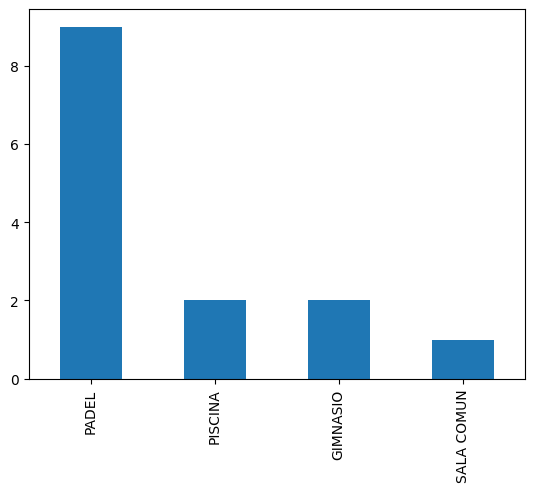

In [14]:
resource_df["type"].value_counts().plot(kind = 'bar')

<AxesSubplot: ylabel='max_pax'>

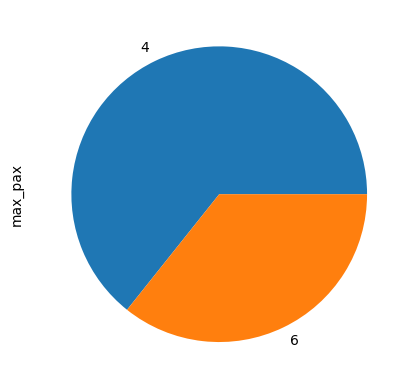

In [16]:
resource_df["max_pax"].value_counts().plot(kind = 'pie')

In [18]:
resource_df["price"].mean()

1.8571428571428572

In [19]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 380 non-null    int64         
 1   name               380 non-null    object        
 2   email              380 non-null    object        
 3   status             380 non-null    object        
 4   creation_date      380 non-null    datetime64[ns]
 5   modification_date  380 non-null    datetime64[ns]
 6   deletion_date      14 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 20.9+ KB


In [29]:
user_df.head()

id             name                     email  status       creation_date  \
0   1     Sheila Brown     sheila.brown@mail.com    True 2022-11-03 16:20:09   
1   2   Jessica Sparks   jessica.sparks@mail.com    True 2022-11-03 16:20:09   
2   3  Jennifer Wilson  jennifer.wilson@mail.com    True 2022-11-03 16:20:09   
3   4   Ethan Townsend   ethan.townsend@mail.com    True 2022-11-03 16:20:09   
4   5    Daniel Wright    daniel.wright@mail.com    True 2022-11-03 16:20:09   

    modification_date deletion_date  
0 2022-11-03 16:20:14           NaT  
1 2022-11-03 16:20:14           NaT  
2 2022-11-03 16:20:14           NaT  
3 2022-11-03 16:20:14           NaT  
4 2022-11-03 16:20:15           NaT

<AxesSubplot: ylabel='status'>

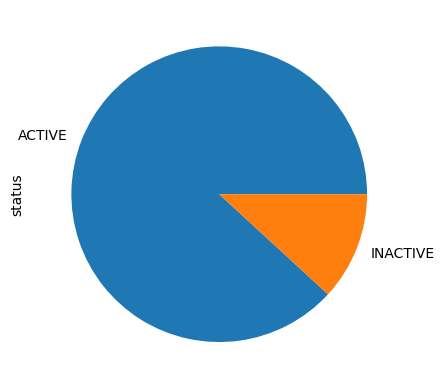

In [21]:
user_df["status"].value_counts().plot(kind = 'pie')

In [7]:
not_possible_situation = \
    (user_df["status"] == "ACTIVE") \
        & (user_df["deletion_date"] > '2012-01-01')
        
user_df[not_possible_situation]

Empty DataFrame
Columns: [id, name, email, status, creation_date, modification_date, deletion_date]
Index: []

In [8]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89151 entries, 0 to 89150
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 89151 non-null  int64         
 1   resource_id        89151 non-null  int64         
 2   user_id            89151 non-null  int64         
 3   start_time         89151 non-null  object        
 4   num_pax            89151 non-null  int64         
 5   status             89151 non-null  object        
 6   creation_date      89151 non-null  datetime64[ns]
 7   modification_date  89151 non-null  datetime64[ns]
 8   deletion_date      0 non-null      datetime64[ns]
 9   date               89151 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(4), object(2)
memory usage: 6.8+ MB


In [9]:
reservation_df.head()

id  resource_id  user_id start_time  num_pax     status  \
0   1           14      180   10:00:00        7  CONFIRMED   
1   2           10       37   10:00:00        1  CONFIRMED   
2   3            6       69   16:30:00        3  CONFIRMED   
3   4            3      116   12:00:00        5  CONFIRMED   
4   5           11        3   16:00:00        7  CONFIRMED   

        creation_date   modification_date deletion_date       date  
0 2022-11-03 20:12:12 2022-11-03 20:12:13           NaT 2017-01-28  
1 2022-11-03 20:12:12 2022-11-03 20:12:13           NaT 2016-05-08  
2 2022-11-03 20:12:12 2022-11-03 20:12:13           NaT 2015-05-17  
3 2022-11-03 20:12:12 2022-11-03 20:12:13           NaT 2019-08-04  
4 2022-11-03 20:12:12 2022-11-03 20:12:14           NaT 2018-11-21

<AxesSubplot: ylabel='status'>

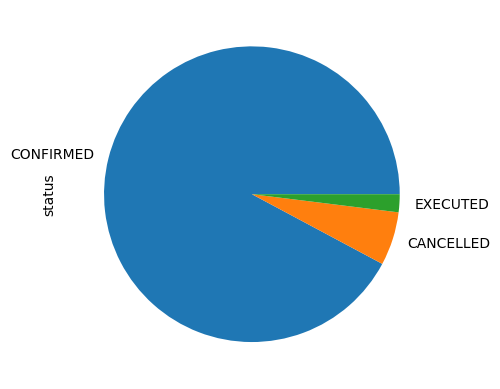

In [10]:
reservation_df["status"].value_counts().plot(kind = 'pie')

In [9]:
reservation_df["date"].value_counts().sort_index()

2012-11-04    11
2012-11-05     6
2012-11-06     7
2012-11-07     6
2012-11-08    11
              ..
2022-10-31    51
2022-11-01    56
2022-11-02    53
2022-11-03    59
2022-11-04    55
Name: date, Length: 3653, dtype: int64

<AxesSubplot: >

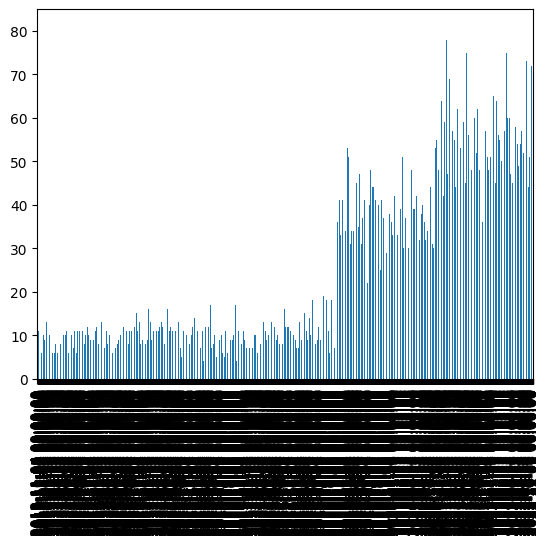

In [10]:
reservation_df["date"].value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot: ylabel='num_pax'>

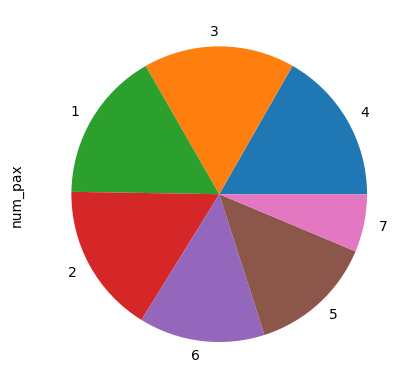

In [11]:
reservation_df["num_pax"].value_counts().plot(kind = 'pie')